In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import urllib2
%matplotlib inline

In [4]:
import dateutil.parser
mta_url_1 = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_150606.txt"
mta_url_2 ="http://web.mta.info/developers/data/nyct/turnstile/turnstile_150613.txt"
mta_url_3 ="http://web.mta.info/developers/data/nyct/turnstile/turnstile_150620.txt"
mta_url_4 ="http://web.mta.info/developers/data/nyct/turnstile/turnstile_150627.txt"
mta_url_5 ="http://web.mta.info/developers/data/nyct/turnstile/turnstile_150704.txt"
mta_url_6 ="http://web.mta.info/developers/data/nyct/turnstile/turnstile_150711.txt"
mta_url_7 ="http://web.mta.info/developers/data/nyct/turnstile/turnstile_150718.txt"
mta_url_8 ="http://web.mta.info/developers/data/nyct/turnstile/turnstile_150725.txt"
mta_url_9 ="http://web.mta.info/developers/data/nyct/turnstile/turnstile_150801.txt"
mta_url_10 ="http://web.mta.info/developers/data/nyct/turnstile/turnstile_150808.txt"
mta_url_11 ="http://web.mta.info/developers/data/nyct/turnstile/turnstile_150815.txt"
mta_url_12 ="http://web.mta.info/developers/data/nyct/turnstile/turnstile_150822.txt"
mta_url_13 ="http://web.mta.info/developers/data/nyct/turnstile/turnstile_150829.txt"

data_1 = urllib2.urlopen(mta_url_1)
data_2 = urllib2.urlopen(mta_url_2)
data_3 = urllib2.urlopen(mta_url_3)
data_4 = urllib2.urlopen(mta_url_4)
data_5 = urllib2.urlopen(mta_url_5)
data_6 = urllib2.urlopen(mta_url_6)
data_7 = urllib2.urlopen(mta_url_7)
data_8 = urllib2.urlopen(mta_url_8)
data_9 = urllib2.urlopen(mta_url_9)
data_10 = urllib2.urlopen(mta_url_10)
data_11 = urllib2.urlopen(mta_url_11)
data_12 = urllib2.urlopen(mta_url_12)
data_13 = urllib2.urlopen(mta_url_13)


# new_data_1 = [x.strip() for x in data_1]
# new_data_2 = [x.strip() for x in data_2]
# new_data_3 = [x.strip() for x in data_3]
# new_data_4 = [x.strip() for x in data_4]
# new_data_5 = [x.strip() for x in data_5]
# new_data_6 = [x.strip() for x in data_6]
# new_data_7 = [x.strip() for x in data_7]
# new_data_8 = [x.strip() for x in data_8]
# new_data_9 = [x.strip() for x in data_9]
# new_data_10 = [x.strip() for x in data_10]
# new_data_11 = [x.strip() for x in data_11]
# new_data_12 = [x.strip() for x in data_12]
# new_data_13 = [x.strip() for x in data_13]

new_data_1 = [
    [x.strip() for x in data_1],
    [x.strip() for x in data_2],
    [x.strip() for x in data_3],
    [x.strip() for x in data_4],
    [x.strip() for x in data_5],
    [x.strip() for x in data_6],
    [x.strip() for x in data_7],
    [x.strip() for x in data_8],
    [x.strip() for x in data_9],
    [x.strip() for x in data_10],
    [x.strip() for x in data_11],
    [x.strip() for x in data_12],
    [x.strip() for x in data_13]
    ]

# data = new_data_1[1:] + new_data_2[1:] 

def add_things(list_of_data):
    data = []
    for i in list_of_data:
        data += i[1:]        
    return data

data = add_things(new_data_1)
 

## create list which contains list elemtents (value_list)
lists_of_list = []
def list_of_dictval(data):
  for item in data:
    rowlist = item.split(",")
    tuple_key = tuple(rowlist[:4])
    date_time = rowlist[-5] + " " + rowlist[-4]
    date_time = dateutil.parser.parse(date_time)
    entries = int(rowlist[-1])
    value_list = []
    value_list.append(tuple_key)
    value_list.append(date_time)
    value_list.append(entries)
    lists_of_list.append(value_list)



## append prior period cumulative entries to current list
def append_prior_cum_entries(lists_of_list):
  cnt = 0 
  for item in lists_of_list:
    if cnt == 0:
      lists_of_list[cnt].append(1)
    elif lists_of_list[cnt][0] == lists_of_list[cnt-1][0]:
      lists_of_list[cnt].append(lists_of_list[cnt-1][2])
    else:
      lists_of_list[cnt].append(1) 
    cnt = cnt + 1

## take difference between two cum entries to get count of entries
def append_count_entries(lists_of_list):
  cnt = 0
  for item in lists_of_list:
    if cnt == 0:
      lists_of_list[cnt].append(0)
    elif lists_of_list[cnt][0] == lists_of_list[cnt-1][0]:
      lists_of_list[cnt].append((lists_of_list[cnt][2] - lists_of_list[cnt][3]))
    else:
      lists_of_list[cnt].append(0) 
    cnt = cnt + 1

## create the dictionary with keys with empty list values
mta_ts_dict = {}
def insert_dict_keys(lists_of_list):
  for item in lists_of_list:
    key = item[0]
    mta_ts_dict[key] = []
  return mta_ts_dict

## populate the values for each key
def mta_time_series_dict(lists_of_list):
  cnt = 0
  for item in lists_of_list:
    key = lists_of_list[cnt][0]
    vlist = []
    vlist.append(item[1])
    vlist.append(item[-1])  
    if key in mta_ts_dict:
      mta_ts_dict[key].append(vlist)
    cnt = cnt + 1
  return mta_ts_dict

list_of_dictval(data)
append_prior_cum_entries(lists_of_list)
append_count_entries(lists_of_list)
insert_dict_keys(lists_of_list)

cum_exits = mta_time_series_dict(lists_of_list)

In [9]:
# turnstile, series = cum_exits.iteritems().next()

In [10]:
# key = '_'.join(turnstile[:3])
# key

'A030_R083_01-06-00'

In [169]:
# make an empty list
list_of_turnstile_sets = []
# for each turnstile, do this to it and add it to your list
for turnstile, data in cum_exits.iteritems():
    key = '_'.join(turnstile[:3])
    turnstile_set = [{'key':key,'timetamp':timestamp,'count':count} for timestamp, count in data]
    list_of_turnstile_sets += turnstile_set

# then make the df from the big list
# clean outliers
df = pd.DataFrame(list_of_turnstile_sets)
df2 = df[(df['count'] <= 2e4) & (df['count'] > 0 ) ]
df3 = df2.set_index(keys=df2.timetamp)
df3['dayofweek'] = df3.timetamp.map(lambda t: t.dayofweek)
# bar_plot = df3.groupby('dayofweek')
df3['timeofday'] = df3.timetamp.map(lambda t: t.hour)

ERROR! Session/line number was not unique in database. History logging moved to new session 743


In [173]:
df3.groupby('dayofweek').agg([np.std, np.mean])

count             timeofday           
                  std        mean       std       mean
dayofweek                                             
0          268.554164  177.587338  6.809267  10.723137
1          276.093436  185.344047  6.833059  10.653479
2          280.313256  190.617875  6.849723  10.656377
3          277.256270  189.352614  6.836855  10.652873
4          260.710841  181.640515  6.844781  10.629799
5          166.642249  119.049974  5.692606  12.620366
6          143.877948  104.880260  6.886361  10.614389

In [211]:
def series_to_list(series):
    list_to_return = []
    count = 0
    for i in series:
        if count > 100:
            break
        else:
            list_to_return.append(i)
            count += 1
            
    return list_to_return    
    
xs = series_to_list(df3['timetamp'])
ys = series_to_list(df3['count'])

In [225]:
day5 = df4[df4['dayofweek'] == 5]

grouping starts here

In [356]:
bins = np.linspace(0, 23, 24)
df5 = df4.groupby(['dayofweek', np.digitize(df4.index.map(lambda t: t.hour), bins)]).mean()

ERROR! Session/line number was not unique in database. History logging moved to new session 746


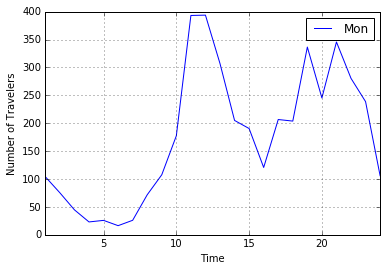

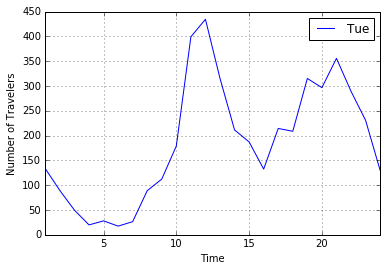

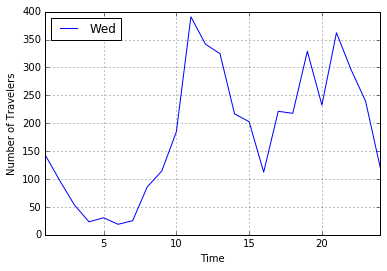

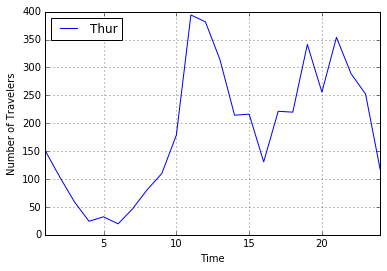

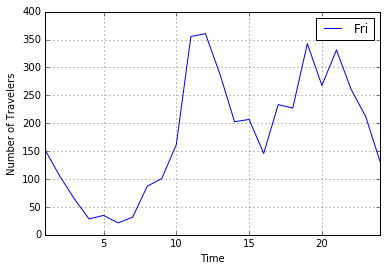

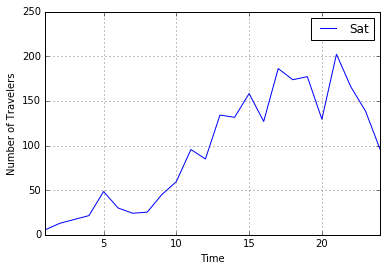

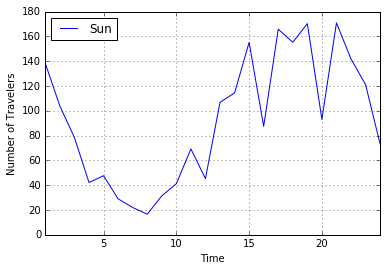

In [444]:
days = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
for i, day in enumerate(days):
    ax = df5.loc[i].plot(grid=True)
    ax.set_xlabel("Time")
    ax.set_ylabel("Number of Travelers")
    plt.legend([day], loc='best')
# ax = df5.loc[day_of_week.Mon].plot(grid=True)
# plt.legend(["Tuesday"], loc='best')

In [409]:
df5

count
dayofweek               
0         1   103.995666
          2    75.262890
          3    44.729056
          4    23.053892
          5    25.846177
          6    16.376670
          7    25.989000
          8    71.732641
          9   107.592168
          10  177.418006
          11  393.074931
          12  393.664639
          13  306.829383
          14  204.962435
          15  190.455202
          16  120.646505
          17  206.591109
          18  203.778685
          19  336.444794
          20  245.203751
          21  345.593308
          22  280.359726
          23  238.664149
          24  105.748357
1         1   133.340017
          2    89.249897
          3    49.726590
          4    19.963080
          5    28.104123
          6    17.488325
...                  ...
5         19  177.146992
          20  129.499555
          21  202.275965
          22  165.389443
          23  138.461504
          24   95.661852
6         1   138.163115
          2   103.769607
          3    78.418859
          4    42.158586
          5    47.637952
          6    29.009192
          7    22.025154
          8    16.585784
          9    31.379470
          10   41.225237
          11   69.261809
          12   45.279152
          13  106.809752
          14  114.423930
          15  155.156110
          16   87.438793
          17  165.792288
          18  155.279378
          19  170.313993
          20   93.099662
          21  170.892982
          22  141.801362
          23  121.146896
          24   73.132010

[167 rows x 1 columns]

need to use this: http://stackoverflow.com/questions/16947336/binning-a-dataframe-in-pandas-in-python

example below

In [290]:
frame = pd.DataFrame({'a': np.random.random(100)*23,
                      'b': np.random.random(100)*23,
                      'id': np.arange(100)})

make bins

In [292]:
bins = np.linspace(0, 23, 24)

put in series and bins and numpy puts the items in that array into their associated bins.  

In [300]:
np.digitize(frame.a, bins)

array([16, 21, 17, 20,  4,  1,  3, 15, 19, 13,  4, 18, 19, 18, 23, 12,  4,
        4,  3, 17, 17,  4,  4,  9, 20, 15, 11, 16,  8,  3, 15,  5,  1, 12,
        8, 11, 12, 19, 13, 12, 13, 18,  6, 18, 20, 20, 13, 23,  7, 19,  3,
       19,  6, 16,  1, 14,  7,  7, 13,  4,  6,  6,  2,  3,  4,  6,  6, 18,
       20,  9, 11, 13, 22, 14, 15,  3,  7, 22, 14, 15, 23, 10, 16, 15, 23,
       21, 17, 10,  1, 12,  2, 12, 10, 23,  6, 20,  8,  2, 23,  6])

In [301]:
groups = frame.groupby(np.digitize(frame.a, bins))

In [302]:
groups.mean()

,a,b,id
1,0.725426,8.799917,44.750000
2,1.599516,1.151812,83.000000
3,2.583489,9.432147,40.166667
4,3.501053,11.404335,26.625000
5,4.485185,10.777896,31.000000
6,5.487965,11.219177,67.375000
7,6.495703,12.406077,59.250000
8,7.761430,6.959885,52.666667
9,8.167561,16.805504,46.000000
10,9.439199,10.471188,86.666667
